<a href="https://colab.research.google.com/github/misbahsy/APMonitor-do/blob/master/EstimationObjective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dynamic Estimation Objectives

<p class='vspace'>The dynamic estimation objective function is a mathematical statement that is minimized or maximized to find a best solution among all possible feasible solutions. The form of this objective function is critical to give desirable solutions for model predictions but also for other applications that use the output of a dynamic estimation application. Two common objective functions are shown below as squared error and l<sub>1</sub>-norm forms<sup>1</sup>.
</p>

##<h2>Squared Error Objective</h2>
<p>The squared error objective is the most common form, used extensively in the literature. It is also the basis for the derivation of the Kalman filter and other well known estimators.
</p>
<p class='vspace'>$$\min_{x,y,p} \Phi = \left(y_x-y\right)^T W_x \left(y_x-y\right) + \left(y-\hat y\right)^T W_m \left(y-\hat y\right) + \Delta p^T W_{\Delta p} \Delta p$$
</p>
<p class='vspace'>$$\mathrm{subject\;\;to}$$
</p>
<p class='vspace'>$$0 = f\left(\frac{dx}{dt},x,y,p\right)$$
</p>
<p class='vspace'>$$0 \le g\left(\frac{dx}{dt},x,y,p\right)$$
</p>

##<h2>l<sub>1</sub>-norm Objective</h2>
<p>The l<sub>1</sub>-norm objective is like an absolute value objective but also includes a dead-band to reject measurement error and stabilize the parameter estimates.
</p>

<p class='vspace'>$$\min_{x,y,p} \Phi = w_x^T \left(e_U+e_L\right) + w_m^T \left(c_U+c_L\right) + w_{\Delta p}^T \left(\Delta p_U+\Delta p_L\right)$$
</p>
<p class='vspace'>$$\mathrm{subject\;\;to}$$
</p>
<p class='vspace'>$$0 = f\left(\frac{dx}{dt},x,y,p\right)$$
</p>
<p class='vspace'>$$0 \le g\left(\frac{dx}{dt},x,y,p\right)$$
</p>
<p class='vspace'>$$e_U \ge y - y_x - \frac{db}{2}$$
</p>
<p class='vspace'>$$e_L \ge y_x - y - \frac{db}{2}$$
</p>
<p class='vspace'>$$c_U \ge y - \hat y$$
</p>
<p class='vspace'>$$c_L \ge \hat y - y$$
</p>
<p class='vspace'>$$\Delta p_U \ge p_i - p_{i-1}$$
</p>
<p class='vspace'>$$\Delta p_L \ge p_{i-1} - p_i$$
</p>
<p class='vspace'>$$e_U, e_L, c_U, c_L, \Delta p_U, \Delta p_L \ge 0$$
</p>
<p class='vspace'>The l<sub>1</sub>-norm objective is like an absolute value of the error but posed in a way to have continuous first and second derivatives. The addition of <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/SlackVariables' rel='nofollow'>slack variables</a> enables an efficient formulation (only linear constraints) that is also convex (local optimum is the global optimum). A unique aspect of the following l<sub>1</sub>-norm objective is the addition of a <em>dead-band</em> or region around the measurements where there is no penalty. It is only when the model predictions are outside of this dead-band that the optimizer makes changes to the parameters to correct the model.
</p>

##<h2>Nomenclature</h2>
<p>There are many symbols used in the definition of the different objective function forms. Below is a nomenclature table that gives a description of each variable and the role in the objective expression.
</p>
<p class='vspace'>$$\Phi=\mathrm{Objective\,Function}$$
</p>
<p class='vspace'>$$y_x=\mathrm{measurements}$$
</p>
<p class='vspace'>$$y=\mathrm{model\,predictions}$$
</p>
<p class='vspace'>$$\hat y=\mathrm{prior\,model\,values}$$
</p>
<p class='vspace'>$$w_x, W_x=\mathrm{measurement\,deviation\,penalty\,(WMEAS)}$$
</p>
<p class='vspace'>$$w_m, W_m=\mathrm{prior\,prediction\,deviation\,penalty\,(WMODEL)}$$
</p>
<p class='vspace'>$$w_{\Delta p},W_{\Delta p}=\mathrm{parameter\,movement\,penalty\,(DCOST)}$$
</p>
<p class='vspace'>$$db=\mathrm{dead-band\,for\,noise\,rejection}$$
</p>
<p class='vspace'>$$x,y,p=\mathrm{states,\,outputs,\,parameters}$$
</p>
<p class='vspace'>$$\Delta p=\mathrm{parameter\,change}$$
</p>
<p class='vspace'>$$f,g=\mathrm{equality\,and\,inequality\,constraints}$$
</p>
<p class='vspace'>$$e_U,e_L=\mathrm{upper\,and\,lower\,error\,outside\,dead-band}$$
</p>
<p class='vspace'>$$c_U,c_L=\mathrm{upper\,and\,lower\,deviation\,from\,prior\,model\,prediction}$$
</p>
<p class='vspace'>$$\Delta p_U,\Delta p_L=\mathrm{upper\,and\,lower\,parameter\,change}$$
</p>
<p class='vspace'>The following example problem is a demonstration of the two different objective forms and some of the configuration to achieve optimal estimator performance.
</p>
<div class='vspace'></div><div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/motion_estimation.zip' rel='nofollow'>Motion Estimation from GPS Position (1D Example)</a></div>



In [1]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/5qY7WyngRbo" frameborder="0" allowfullscreen></iframe>


##<h2>Exercise</h2>
<p><strong>Objective:</strong> Estimate parameters of a highly nonlinear system. Use an initialization strategy to find a suitable approximation for the parameter estimation. Create a MATLAB or Python script to simulate and display the results. <em>Estimated Time: 2 hours</em>
</p>
<p class='vspace'>The spread of HIV in a patient is approximated with balance equations on (H)ealthy, (I)nfected, and (V)irus population counts<sup>2</sup>.
</p>
<div class='vspace'></div><pre> Initial Conditions
 H = healthy cells = 1,000,000
 I = infected cells = 0
 V = virus = 100
 LV = log virus = 2

 Equations
 dH/dt = kr<sub>1</sub> - kr<sub>2</sub> H - kr<sub>3</sub> H V
 dI/dt = kr<sub>3</sub> H V - kr<sub>4</sub> I
 dV/dt = -kr<sub>3</sub> H V - kr<sub>5</sub> V + kr<sub>6</sub> I
 LV = log<sub>10</sub>(V)
</pre><p class='vspace'>There are six parameters (kr<sub>1..6</sub>) in the model that provide the rates of cell death, infection spread, virus replication, and other processes that determine the spread of HIV in the body.
</p>
<div class='vspace'></div><pre> Parameters
 kr<sub>1</sub> = new healthy cells
 kr<sub>2</sub> = death rate of healthy cells
 kr<sub>3</sub> = healthy cells converting to infected cells
 kr<sub>4</sub> = death rate of infected cells
 kr<sub>5</sub> = death rate of virus
 kr<sub>6</sub> = production of virus by infected cells
</pre><p class='vspace'>The following data is provided from a virus count over the course of 15 years. Note that the virus count information is reported in log scale.
</p>
<div class='vspace'></div><div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/data_hiv.zip' rel='nofollow'>HIV Data and Model Files</a></div>
<div class='vspace'></div><div><img src='http://apmonitor.com/do/uploads/Main/hiv_virus_count.png' alt='' title='' /></div>
<p class='vspace'>With guess values for parameters (kr<sub>1..6</sub>), approximately match the laboratory data for this patient as an initial solution. Use this initial solution to compute an optimal solution with dynamic estimation. Adjust parameters kr<sub>1..6</sub> to match the virus count data. Start with different kr values to verify that the solution is not just locally optimal but also globally optimal.
</p>

##<h2>Solution</h2>
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/estimate_hiv.zip' rel='nofollow'>HIV Estimation in MATLAB and Python</a></div>

In [2]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/KuivI_QZ0IA?rel=0" frameborder="0" allowfullscreen></iframe>


apm 35.203.171.117_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           16
   Intermediates:            0
   Connections  :            0
   Equations    :           10
   Residuals    :           10
 
 Variable time shift OFF
 --- Begin Pre-solve  -----------------------
  Original nvar:          780
  Original neqn:          780
  Pre-solve turn off DOF
  Pre-solve Variables:          780
  Pre-solve Equations:          780
  --- Solve block size:            2
 ----------------------------------------------
 Dynamic Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  0.00000E+00  1.00000E+03
    1  0.00000E+00  1.

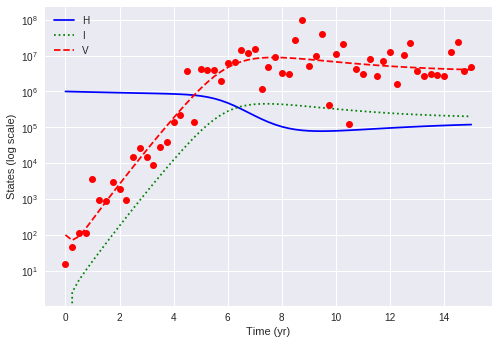

In [3]:
#@title Solution in GEKKO

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])

from __future__ import division
from gekko import GEKKO
import numpy as np

# Manually enter guesses for parameters
lkr = [3,np.log10(0.1),np.log10(2e-7),\
       np.log10(0.5),np.log10(5),np.log10(100)]

# Model
m = GEKKO()

# Time
m.time = np.linspace(0,15,61)
# Parameters to estimate
lg10_kr = [m.FV(value=lkr[i]) for i in range(6)]
# Variables
kr = [m.Var() for i in range(6)]
H = m.Var(value=1e6)
I = m.Var(value=0)
V = m.Var(value=1e2)
# Variable to match with data
LV = m.CV(value=2)
# Equations
m.Equations([10**lg10_kr[i]==kr[i] for i in range(6)])
m.Equations([H.dt() == kr[0] - kr[1]*H - kr[2]*H*V,
             I.dt() == kr[2]*H*V - kr[3]*I,
             V.dt() == -kr[2]*H*V - kr[4]*V + kr[5]*I, 
             LV == m.log10(V)])


# Estimation

# Global options
m.options.IMODE = 5 #switch to estimation
m.options.TIME_SHIFT = 0 #don't timeshift on new solve
m.options.EV_TYPE = 2 #l2 norm
m.options.COLDSTART = 2
m.options.SOLVER = 1
m.options.MAX_ITER = 1000

m.solve()

for i in range(5):
    lg10_kr[i].STATUS = 1 #Allow optimizer to fit these values
    lg10_kr[i].DMAX = 2
    lg10_kr[i].LOWER = -10
    lg10_kr[i].UPPER = 10

# patient virus count data
data = np.array([[0,1.20E+00],[0.25,1.67E+00],[0.5,2.06E+00],\
                [0.75,2.05E+00],[1,3.57E+00],[1.25,2.96E+00],\
                [1.5,2.95E+00],[1.75,3.48E+00],[2,3.27E+00], \
                [2.25,2.98E+00],[2.5,4.17E+00],[2.75,4.41E+00],\
                [3,4.16E+00],[3.25,3.94E+00],[3.5,4.44E+00],\
                [3.75,4.60E+00],[4,5.15E+00],[4.25,5.34E+00],\
                [4.5,6.56E+00],[4.75,5.16E+00],[5,6.63E+00],\
                [5.25,6.60E+00],[5.5,6.59E+00],[5.75,6.28E+00],\
                [6,6.79E+00],[6.25,6.81E+00],[6.5,7.16E+00],\
                [6.75,7.06E+00],[7,7.19E+00],[7.25,6.07E+00],\
                [7.5,6.67E+00],[7.75,6.97E+00],[8,6.51E+00],\
                [8.25,6.48E+00],[8.5,7.44E+00],[8.75,7.98E+00],\
                [9,6.71E+00],[9.25,6.98E+00],[9.5,7.60E+00],\
                [9.75,5.62E+00],[10,7.04E+00],[10.25,7.31E+00],\
                [10.5,5.08E+00],[10.75,6.62E+00],[11,6.48E+00],\
                [11.25,6.91E+00],[11.5,6.44E+00],[11.75,6.85E+00],\
                [12,7.09E+00],[12.25,6.20E+00],[12.5,7.02E+00],\
                [12.75,7.34E+00],[13,6.57E+00],[13.25,6.42E+00],\
                [13.5,6.50E+00],[13.75,6.46E+00],[14,6.42E+00],\
                [14.25,7.09E+00],[14.5,7.37E+00],[14.75,6.56E+00],\
                [15,6.69E+00]])

# Convert log-scaled data for plotting
log_v = data[:,1] # 2nd column of data
v = np.power(10,log_v)

LV.FSTATUS = 1 #receive measurements to fit
LV.STATUS = 1 #build objective function to match data and prediction
LV.value = log_v #v data

m.solve()


# Plot results
import matplotlib.pyplot as plt
plt.figure(1)
plt.semilogy(m.time,H,'b-')
plt.semilogy(m.time,I,'g:')
plt.semilogy(m.time,V,'r--')
plt.semilogy(data[:,][:,0],v,'ro')
plt.xlabel('Time (yr)')
plt.ylabel('States (log scale)')
plt.legend(['H','I','V'])
plt.show()